In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests
%matplotlib inline

# Читаем данные

In [2]:
data = pd.read_excel('memantine.xls', sheet_name=1)

In [3]:
#список белков в исследовании
proteins_list = data.columns[1:-4]

In [4]:
# Число наблюдений в каждой подгруппе
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-CS-m    135
c-SC-s    135
c-CS-s    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [5]:
data['class_gen'] = data['class'].apply(lambda x: x[2:])

In [6]:
#число здоровых и трисомных мышей
data['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

# Посмотрим на средние и медианы в группах

In [7]:
data.groupby(['Genotype', 'class'])[proteins_list].mean()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
Genotype class                                                                
Control  c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932   
         c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423   
         c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253   
         c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368   
Ts65Dn   t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621   
         t-CS-s  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466   
         t-SC-m  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131   
         t-SC-s  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759   

                  pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N  \
Genotype class                                            ...             
Control  c-CS-m  0.182211   2.916187  0.198484  1.492318  ...  0.226911   
         c-CS-s  0.168356   2.935576  0.208439  1.686844  ...  0.214818   
         c-SC-m  0.189547   4.736327  0.208149  1.278566  ...  0.224470   
         c-SC-s  0.184975   3.361288  0.214949  1.327714  ...  0.241853   
Ts65Dn   t-CS-m  0.173956   3.121801  0.203395  1.563905  ...  0.216934   
         t-CS-s  0.164795   2.488902  0.210041  1.518302  ...  0.222144   
         t-SC-m  0.201007   4.277257  0.231789  1.381516  ...  0.230667   
         t-SC-s  0.185318   4.176555  0.227165  1.204840  ...  0.234828   

                    BAD_N    BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N  \
Genotype class                                                                 
Control  c-CS-m  0.156882  0.132539  0.119782  0.123929  0.467403   0.142027   
         c-CS-s  0.144670  0.126590  0.112512  0.126954  0.445322   0.145542   
         c-SC-m  0.169294  0.155980  0.128108  0.143614  0.456874   0.185664   
         c-SC-s  0.156121  0.133082  0.132929  0.135007  0.471512   0.152480   
Ts65Dn   t-CS-m  0.150572  0.132005  0.108196  0.127762  0.413597   0.149539   
         t-CS-s  0.150884  0.130186  0.111354  0.121971  0.433587   0.158388   
         t-SC-m  0.153697  0.137467  0.137287  0.130234  0.445738   0.226197   
         t-SC-s  0.174648  0.137082  0.119201  0.133663  0.428207   0.208931   

                   EGR1_N  H3MeK4_N    CaNA_N  
Genotype class                                 
Control  c-CS-m  0.174599  0.178675  1.523659  
         c-CS-s  0.166534  0.172007  1.617609  
         c-SC-m  0.217339  0.220825  1.009957  
         c-SC-s  0.200690  0.219120  1.157639  
Ts65Dn   t-CS-m  0.162359  0.180920  1.633341  
         t-CS-s  0.158174  0.191430  1.552633  
         t-SC-m  0.196089  0.247652  1.041134  
         t-SC-s  0.184275  0.226498  1.229815  

[8 rows x 77 columns]

In [8]:
data.groupby(['Genotype', 'class'])[proteins_list].median()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
Genotype class                                                                
Control  c-CS-m  0.472297  0.640591  0.333664  2.391115  4.258744  0.227052   
         c-CS-s  0.414939  0.612273  0.340390  2.393446  4.168781  0.208671   
         c-SC-m  0.275085  0.437696  0.291883  2.124527  3.359592  0.234453   
         c-SC-s  0.274443  0.454752  0.314812  2.442128  3.878765  0.234393   
Ts65Dn   t-CS-m  0.613747  0.786627  0.317112  2.217863  3.572717  0.213226   
         t-CS-s  0.474926  0.732011  0.295108  2.147198  3.558131  0.208735   
         t-SC-m  0.324465  0.567582  0.318074  2.406845  4.029405  0.262364   
         t-SC-s  0.347893  0.551938  0.322757  2.248275  3.418932  0.245555   

                  pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N  \
Genotype class                                            ...             
Control  c-CS-m  0.182671   2.698185  0.198426  1.489857  ...  0.228732   
         c-CS-s  0.174440   2.795285  0.206734  1.470238  ...  0.216270   
         c-SC-m  0.183598   4.671556  0.207211  1.256820  ...  0.214774   
         c-SC-s  0.185532   3.235436  0.212318  1.279603  ...  0.236464   
Ts65Dn   t-CS-m  0.173021   2.371592  0.204358  1.553389  ...  0.218807   
         t-CS-s  0.163033   2.322522  0.206376  1.471846  ...  0.219722   
         t-SC-m  0.198871   4.325740  0.234054  1.369267  ...  0.226149   
         t-SC-s  0.187351   3.777065  0.230500  1.222532  ...  0.233932   

                    BAD_N    BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N  \
Genotype class                                                                 
Control  c-CS-m  0.149166  0.130020  0.119767  0.121192  0.464875   0.143380   
         c-CS-s  0.140853  0.121025  0.112723  0.125973  0.445266   0.132051   
         c-SC-m  0.159367  0.147283  0.127415  0.139884  0.468247   0.188149   
         c-SC-s  0.151787  0.132639  0.132792  0.128480  0.474948   0.143908   
Ts65Dn   t-CS-m  0.145288  0.125524  0.108158  0.122488  0.416937   0.146112   
         t-CS-s  0.148592  0.120520  0.111658  0.119182  0.419812   0.176898   
         t-SC-m  0.148668  0.134000  0.138142  0.126124  0.450092   0.190641   
         t-SC-s  0.170716  0.133201  0.118278  0.128686  0.419308   0.193577   

                   EGR1_N  H3MeK4_N    CaNA_N  
Genotype class                                 
Control  c-CS-m  0.163131  0.162554  1.572257  
         c-CS-s  0.161498  0.163931  1.601309  
         c-SC-m  0.208506  0.214779  1.007969  
         c-SC-s  0.193232  0.199104  1.182216  
Ts65Dn   t-CS-m  0.156070  0.173266  1.647314  
         t-CS-s  0.154884  0.184648  1.591999  
         t-SC-m  0.190158  0.243651  1.061176  
         t-SC-s  0.177988  0.223079  1.242232  

[8 rows x 77 columns]

In [9]:
classes = list(data['class_gen'].unique())
classes

['CS-m', 'SC-m', 'CS-s', 'SC-s']

# Нужные методы

In [10]:
# МПГ
def multiTest(p_values, method='bonferroni'):
    #вычисление скорректированных p-value
    corrected_p_values = np.apply_along_axis(lambda x: multipletests(x, method=method)[1],
     axis=0, arr=p_values.values[:,1:])
    
    #вычисление решений по скорректированных p-value
    corrected_rejections = np.apply_along_axis(lambda x: multipletests(x, method=method)[0],
     axis=0, arr=p_values.values[:,1:])
    
    #сохраняем скорректированные p-value в датафрейм
    corrected_p_values_df = pd.DataFrame(corrected_p_values,
     columns=p_values.columns[1:].values+'_corrected')
    
    #сохраняем решения по скорректированным p-value в датафрейм
    corrected_rejections_df = pd.DataFrame(corrected_rejections,
     columns=p_values.columns[1:].values+'_reject')
    
    #добавляем финальное решение - хотя бы в одной группе отвергается нулевая - есть различие
    corrected_rejections_df['final_reject'] = corrected_rejections_df.max(axis=1)

    #собираем в итоговый датафрейм скорректированные p-value и решения по ним
    multi_test_result = pd.concat([p_values, corrected_p_values_df, corrected_rejections_df], axis=1)


    return multi_test_result

In [11]:
# Выводы
def summary(dataset_result):
    print("Количество белков, экспрессия которых отличается хотя бы в одной подгруппе: {}".format((dataset_result['final_reject'] == True).sum()))
    print("Количество белков, экспрессия которых не отличается ни в одной подгруппе: {}".format((dataset_result['final_reject'] == False).sum()))
    print("--------------------------------------------------------------------------")
    print('Количество генов с различающейся экспрессией по подгруппам:')
    print(dataset_result[[c+'_reject' for c in classes]].sum())
    print("--------------------------------------------------------------------------")
    print("Тёмный - есть различие в экспрессии")
    print("Светлый - нет различия в экспрессии")
    plt.figure(figsize=[10,20])
    _=sns.heatmap(dataset_result[[c+'_reject' for c in classes]])

# Дисперсионный анализ

In [12]:
from scipy.stats import f_oneway

f_test_result = pd.DataFrame(columns=classes, index=proteins_list)
for selected_class in classes:
    for selected_protein in proteins_list:
        protein_groups = list(cur_df[selected_protein].dropna() for _, cur_df in 
                              data.loc[data['class_gen'] == selected_class].groupby('class'))
        f_res = f_oneway(*protein_groups)
        f_test_result.loc[selected_protein, selected_class] = f_res[1]
f_test_result = f_test_result.reset_index().rename({'index':'protein'}, axis=1)

#Корректировка на МПГ
f_test_result_corrected = multiTest(f_test_result)
f_test_result_corrected.head()

,protein,CS-m,SC-m,CS-s,SC-s,CS-m_corrected,SC-m_corrected,CS-s_corrected,SC-s_corrected,CS-m_reject,SC-m_reject,CS-s_reject,SC-s_reject,final_reject
0,DYRK1A_N,9.79967e-15,1.32279e-12,0.182102,7.34137e-15,7.54574e-13,1.01855e-10,1,5.65285e-13,True,True,False,True,True
1,ITSN1_N,8.09194e-12,8.48281e-38,0.801073,6.00338e-16,6.23079e-10,6.53176e-36,1,4.6226e-14,True,True,False,True,True
2,BDNF_N,7.63624e-06,1.60787e-11,4.67483e-08,0.0517823,0.00058799,1.23806e-09,3.59962e-06,1,True,True,True,False,True
3,NR1_N,1.18628e-05,5.20036e-12,1.55253e-07,0.000603815,0.000913439,4.00428e-10,1.19544e-05,0.0464938,True,True,True,True,True
4,NR2A_N,8.94094e-11,1.33548e-10,7.21666e-11,0.0028397,6.88452e-09,1.02832e-08,5.55683e-09,0.218657,True,True,True,False,True


# Попарное сравнение критерием Стьюдента
Алгоритм првоерки следующий:
- Выбирается один белок
- Выбирается одна подгруппа
- Формируется две выборки: выборка экспрессий выбранного белка среди трисомных мышей этой подгруппы и выборка экспрессий выбранного белка среди здоровых мышей этой подгруппы
- Для выделеных выборок проводится тест на равенство дисперсий
- Для выделеных выборок проводит тест Стьюдента на равенство средних в двух независимых выборках с учётом результата теста на равенство дисперсий

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import kruskal

#t-тест на равенство средних, возвращает - отклонять ли нулевую гипотезу о равенствед
def ttest(a, b, p_val=0.05):
    # Проверяем равенство дисперсий
    barlett_result = bartlett(a, b)
    variance_is_equal = barlett_result[1]>=0.05
    #тест на равенство средних
    ttest_result = ttest_ind(a, b, equal_var=variance_is_equal, nan_policy = 'omit')
    reject = ttest_result[1]<p_val
    return ttest_result[1]

In [14]:
# делим на контрольных и трисомных
trisom_data = data.loc[data['Genotype']=='Ts65Dn']
control_data = data.loc[data['Genotype']=='Control']

#проводим тестирование
ttest_result = pd.DataFrame(columns=classes, index=proteins_list)
#одна подгруппа
for cl in classes:
    #один белок
    for protein in proteins_list:
        #выделение подвыборок
        control_protein_class = control_data.loc[(control_data['class'].apply(lambda x: x[2:]))==cl, protein]
        trisom_protein_class = trisom_data.loc[(trisom_data['class'].apply(lambda x: x[2:]))==cl, protein]
        # t-тест
        t_test_pval = ttest(control_protein_class, trisom_protein_class)
        # сохранение результатов t-теста
        ttest_result.loc[protein, cl] = t_test_pval

ttest_result = ttest_result.reset_index().rename({'index':'protein'}, axis=1)

In [15]:
ttest_result_corrected = multiTest(ttest_result)

In [16]:
ttest_result_corrected.head()

,protein,CS-m,SC-m,CS-s,SC-s,CS-m_corrected,SC-m_corrected,CS-s_corrected,SC-s_corrected,CS-m_reject,SC-m_reject,CS-s_reject,SC-s_reject,final_reject
0,DYRK1A_N,2.14343e-14,7.32464e-12,0.137414,1.86567e-14,1.65044e-12,5.63997e-10,1,1.43657e-12,True,True,False,True,True
1,ITSN1_N,1.48895e-11,8.48281e-38,0.779849,1.43452e-15,1.14649e-09,6.53176e-36,1,1.10458e-13,True,True,False,True,True
2,BDNF_N,7.63624e-06,1.60787e-11,1.97333e-08,0.0525825,0.00058799,1.23806e-09,1.51946e-06,1,True,True,True,False,True
3,NR1_N,1.4414e-05,5.20036e-12,5.8263e-08,0.000603815,0.00110988,4.00428e-10,4.48625e-06,0.0464938,True,True,True,True,True
4,NR2A_N,8.94094e-11,2.43489e-10,8.56083e-12,0.0028397,6.88452e-09,1.87486e-08,6.59184e-10,0.218657,True,True,True,False,True


# Выводы

Количество белков, экспрессия которых отличается хотя бы в одной подгруппе: 71
Количество белков, экспрессия которых не отличается ни в одной подгруппе: 6
--------------------------------------------------------------------------
Количество генов с различающейся экспрессией по подгруппам:
CS-m_reject    42
SC-m_reject    50
CS-s_reject    25
SC-s_reject    41
dtype: int64
--------------------------------------------------------------------------
Тёмный - есть различие в экспрессии
Светлый - нет различия в экспрессии


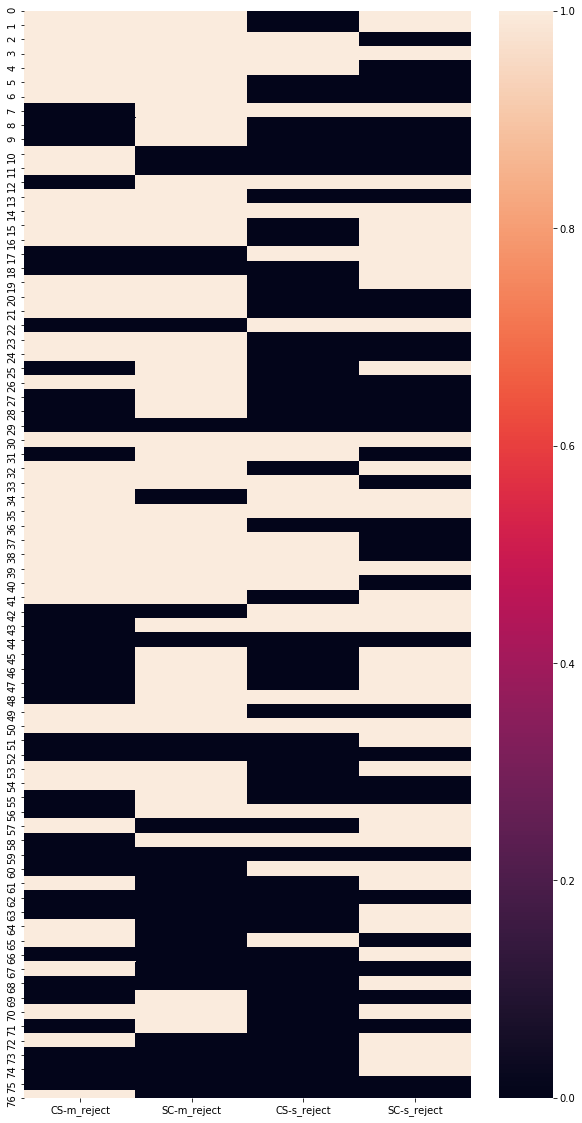

In [17]:
summary(f_test_result_corrected)

Количество белков, экспрессия которых отличается хотя бы в одной подгруппе: 73
Количество белков, экспрессия которых не отличается ни в одной подгруппе: 4
--------------------------------------------------------------------------
Количество генов с различающейся экспрессией по подгруппам:
CS-m_reject    42
SC-m_reject    50
CS-s_reject    27
SC-s_reject    41
dtype: int64
--------------------------------------------------------------------------
Тёмный - есть различие в экспрессии
Светлый - нет различия в экспрессии


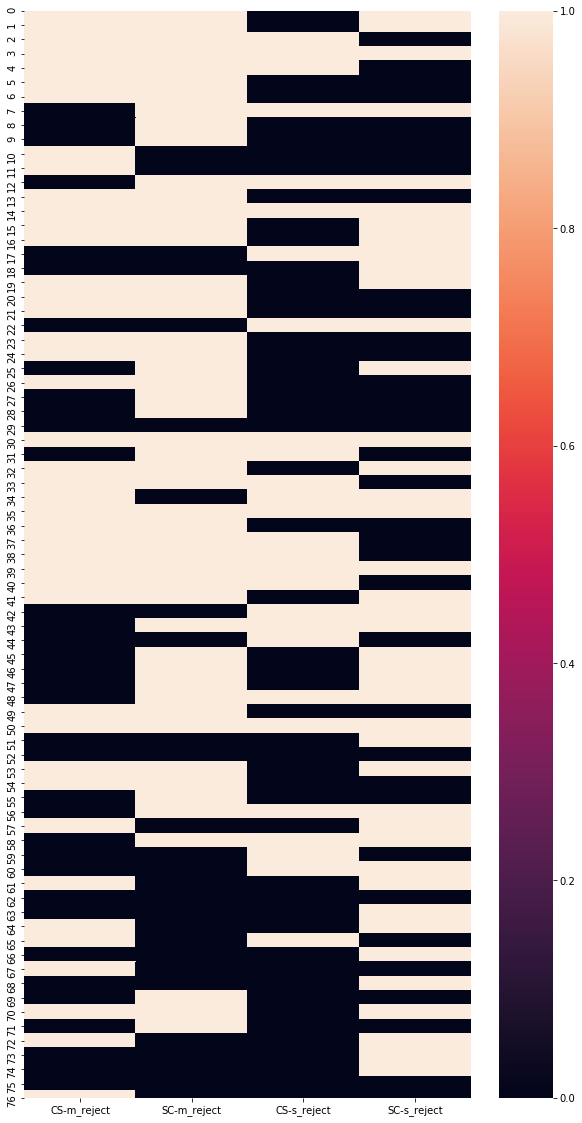

In [18]:
summary(ttest_result_corrected)

# Ответ
Да:
- по 71 белкам экспрессия хотя бы в одной подгруппе различается
- по 6 белкам экспрессия ни в одной подгруппе не различается